# 기말프로젝트 대상

#### URL: https://github.com/sungminju7488/DGU-MLDL


## Dataset

#### URL: https://www.kaggle.com/datasets/zohaib30/streeteasy-dataset

#### Task
StreetEasy is New York City’s leading real estate marketplace. You will be working with a dataset that contains a sample of 5,000 rentals listings in Manhattan.

#### Datasets
It has the following columns:

- rental_id
- rent
- bedrooms
- bathrooms
- size_sqft
- min_to_subway
- floor
- building_age_yrs
- no_fee
- has_roofdeck
- has_washer_dryer
- has_doorman
- has_elevator
- has_dishwasher
- has_patio
- has_gym
- neighborhood
- borough

#### Features(x): bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
#### Targets(y): rent


# 성능향상 기법

### Linear Regression

1.StandardScaler을 활용한 데이터셋 표준화
2.train과 test 비율을 7:3에서 8:2로 조정하였음. 
3.실제값y_test과 예측값y_predict에서 상위 95%에 해당되는 이상치 데이터를 필터링하는 작업을 수행하였음.

Linear Regression 결과
79.24%에서 85.06%로 약 6%의 성능이 향상됨.


### Decision Tree

1.StandardScaler을 활용한 데이터셋 표준화
2.max_depth를 2에서 5로 조정하여 하이퍼파라미터 튜닝

Decision tree 결과
오차가  2.890416e+06에서  0.187977로 줄어들었음. 


## Data preprocessing

In [179]:
import pandas as pd

df = pd.read_csv('./manhattan.csv')
df.head()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


In [180]:
df['rent'].describe()

count     3539.000000
mean      5138.940379
std       3162.824760
min       1300.000000
25%       3150.000000
50%       4000.000000
75%       6000.000000
max      20000.000000
Name: rent, dtype: float64

In [182]:
# Removing outliers (as done previously)
#Q1 = df['rent'].quantile(0.25)
#Q3 = df['rent'].quantile(0.75)
#IQR = Q3 - Q1
#lower_bound = Q1 - 1.5 * IQR
#upper_bound = Q3 + 1.5 * IQR
#df = df[(df['rent'] >= lower_bound) & (df['rent'] <= upper_bound)]

In [183]:
df

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,7582,4210,1.0,1,532,3,8.0,16,1,1,1,1,1,1,0,1,Chelsea,Manhattan
3535,5686,6675,2.0,2,988,5,10.0,9,1,1,1,1,1,1,0,1,Tribeca,Manhattan
3536,9679,1699,0.0,1,250,2,5.0,96,0,0,0,0,0,0,0,0,Little Italy,Manhattan
3537,5188,3475,1.0,1,651,6,5.0,14,1,0,1,1,1,1,0,1,Midtown West,Manhattan


In [184]:
#변수를 표준화시킴
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['size_sqft'] = scaler.fit_transform(df[['size_sqft']])
df['min_to_subway'] = scaler.fit_transform(df[['min_to_subway']])
df['floor'] = scaler.fit_transform(df[['floor']])
df['building_age_yrs'] = scaler.fit_transform(df[['building_age_yrs']])
df['rent'] = scaler.fit_transform(df[['rent']])



In [185]:
df

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,-0.818669,0.0,1,-0.962011,0.730862,-0.904097,-0.888763,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,2.011480,2.0,2,2.218694,-0.176116,-0.995343,1.117593,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,-0.202044,1.0,1,-0.049651,-0.538908,3.566974,-0.584000,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,-0.108760,1.0,1,0.073811,-0.357512,-0.356619,-0.533206,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,3.908786,2.0,2,8.077886,-0.357512,-0.721604,2.133470,0,0,0,1,1,1,0,1,Soho,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,7582,-0.293747,1.0,1,-0.853197,-0.357512,-0.356619,-0.914160,1,1,1,1,1,1,0,1,Chelsea,Manhattan
3535,5686,0.485729,2.0,2,0.101014,0.005279,-0.174126,-1.091938,1,1,1,1,1,1,0,1,Tribeca,Manhattan
3536,9679,-1.087770,0.0,1,-1.443302,-0.538908,-0.630358,1.117593,0,0,0,0,0,0,0,0,Little Italy,Manhattan
3537,5188,-0.526167,1.0,1,-0.604182,0.186675,-0.630358,-0.964953,1,0,1,1,1,1,0,1,Midtown West,Manhattan


In [186]:
df = df.drop(['neighborhood','borough','rental_id'],axis = 1)

In [187]:
print(df.columns)
print(len(df.columns))
print(len(df))

Index(['rent', 'bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor',
       'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer',
       'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio',
       'has_gym'],
      dtype='object')
15
3539


## Model Construction

### Split Data: Train data,Test Data

In [188]:
import numpy as np

In [189]:
#train와 test비율을 7:3에서 8:2로 변경

from sklearn.model_selection import train_test_split

x = df[['bedrooms','bathrooms','size_sqft',
        'min_to_subway','floor','building_age_yrs','no_fee','has_roofdeck',
       'has_washer_dryer','has_doorman','has_elevator','has_dishwasher',
       'has_patio','has_gym']] #주택임대료에 영향을 주는 값

y = df[['rent']]

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8,test_size = 0.2)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(2831, 14) (708, 14) (2831, 1) (708, 1)


## Train Model & Select Model

### ● Linear Regression

In [190]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression(fit_intercept = True) #선형회귀
mlr.fit(x_train,y_train)

LinearRegression()

In [191]:
y_predict = mlr.predict(x_test) #x_test를 넣어 예측한 값들을 y_predict이라고 가정

In [192]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
accuracy = mlr.score(x_test, y_test)
mse, rmse, accuracy

(0.2399527978337353, 0.48984977067845537, 0.7703248279913737)

#### Linear Regression Graph

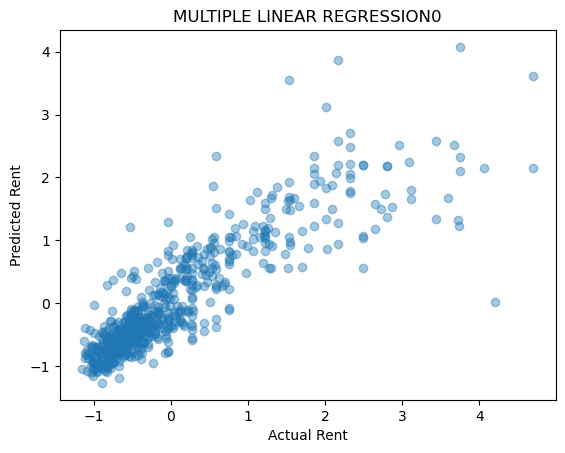

In [193]:
import matplotlib.pyplot as plt

plt.scatter(y_test,y_predict,alpha = 0.4)
plt.xlabel('Actual Rent') #x축은 실제 주택임대료
plt.ylabel('Predicted Rent') #y축은 데이터를 통해 예측한 주택임대료
plt.title('MULTIPLE LINEAR REGRESSION0')# 다중선형회귀
plt.show() #그래프그려줌

In [197]:
# 오차 계산
errors = np.abs(y_test.squeeze() - y_predict.squeeze())
# 오차의 95번째 백분위수 계산
threshold = np.percentile(errors, 95)

# 상위 5% 오차를 이상치로 필터링
non_outliers = errors <= threshold

# 이상치를 제거한 후의 y_test, y_predict 및 x_test
y_test_filtered = y_test[non_outliers]
y_predict_filtered = y_predict[non_outliers]
x_test_filtered = x_test[non_outliers]

# 이상치를 제거한 후의 새로운 MSE, RMSE, 정확도 계산
mse_filtered = mean_squared_error(y_test_filtered, y_predict_filtered)
rmse_filtered = np.sqrt(mse_filtered)
accuracy_filtered = mlr.score(x_test_filtered, y_test_filtered)

mse_filtered, rmse_filtered, accuracy_filtered

(0.09932514465705108, 0.3151589196850552, 0.8506492387850377)

### ● DecisionTree

In [207]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [212]:

#하이퍼파라미터 튜닝: max_depth를 2에서 5로 조정 

mdt = DecisionTreeRegressor(random_state=0,max_depth=5)

mdt.fit(x_train,y_train)


DecisionTreeRegressor(max_depth=5, random_state=0)

In [213]:
my_apartment = [[1,1,620,16,1,98,1,0,1,0,0,1,1,0]] #14개의 x값(임대료에 영향을 주는 값) 대입
my_predict= mdt.predict(my_apartment) #DecisionTree를 통한 주택 임대료 예측
my_predict #위와같은 x값을 대입했을 때 주택임대료 값

c:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([2.33223693])

## Performance

### Set Loss Function

In [214]:
def mse_loss(pre, y): #손실함수 mse함수 정의
    return((pre-y)**2).mean()

In [215]:
mlr.fit(x,y)
pre = mlr.predict(x)

loss_value = mse_loss(pre,y) #주택임대료 예측값과 실제값을 mse값 구하는 함수에 대입

print(loss_value) # Linear Regression의 손실함수 결과값

rent    0.220693
dtype: float64


In [216]:
mdt.fit(x,y)
pre = mdt.predict(x)

pre1 = pre.reshape(3539,-1)

loss_value = mse_loss(pre1,y) #주택임대료 예측값과 실제값을 mse값 구하는 함수에 대입

print(mdt,loss_value) # Decision Tree의 손실함수 결과값


DecisionTreeRegressor(max_depth=5, random_state=0) rent    0.187977
dtype: float64


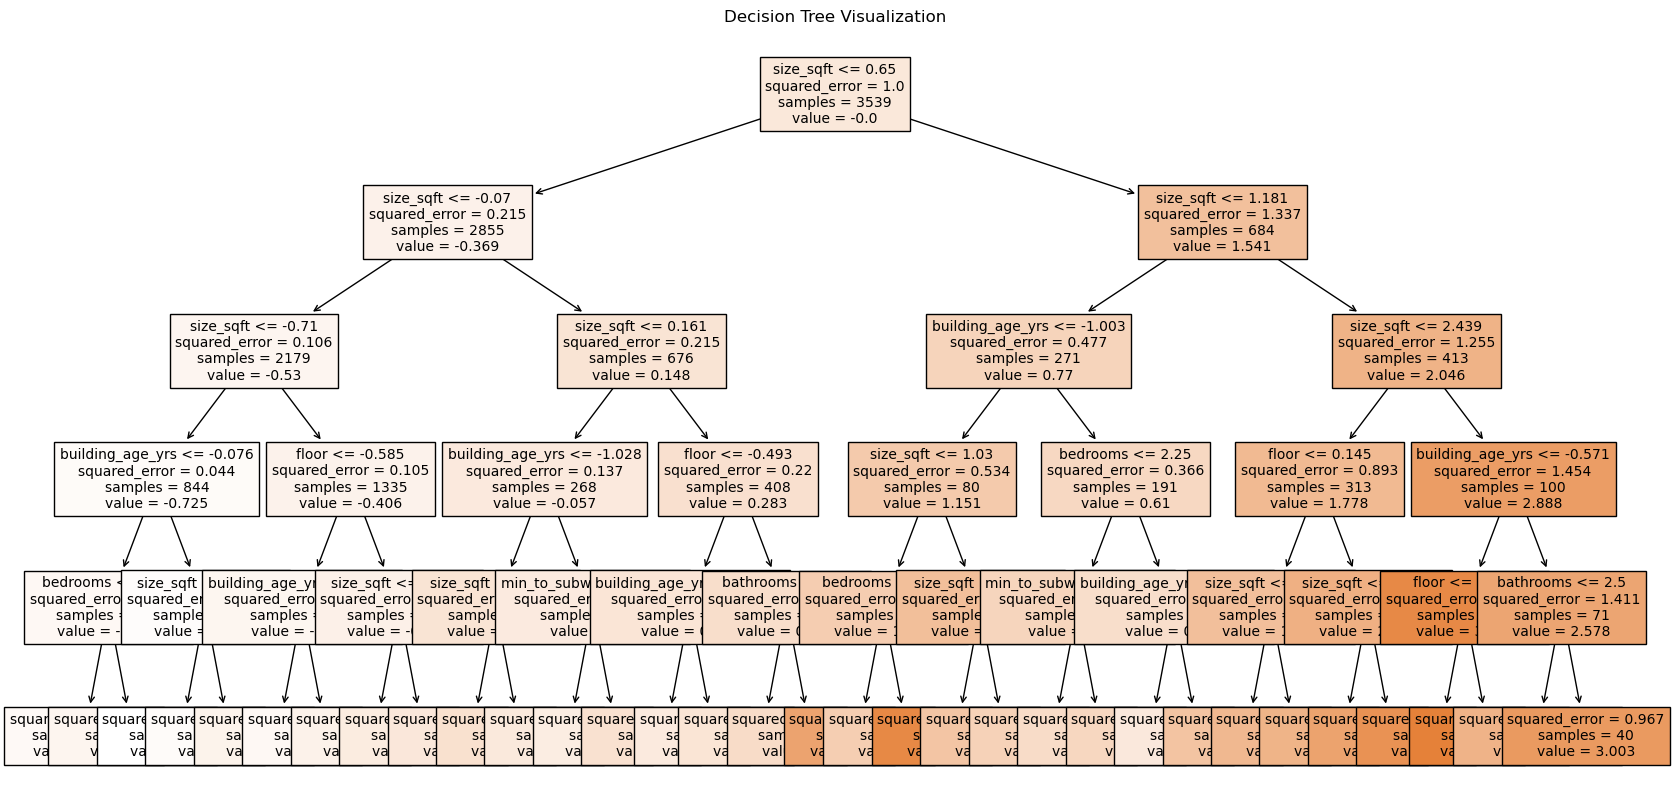

In [218]:

# 결정 트리 시각화
plt.figure(figsize=(20, 10))
plot_tree(mdt, filled=True, feature_names=x.columns, fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()